In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

### Анализ и обработка данных

In [4]:
df

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender,Default
0,22487461,2015-11-05,2015-08-29,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,5,36.0,Male,0
1,62494261,2016-08-26,2015-12-21,3.5,-2.0,5.0,2016-07-30,2.0,Tavern_district_4,7,2.5,-3,14,3.5,-3,5,29.0,Female,1
2,34822849,2016-02-18,2015-11-11,NaN,NaN,NaN,NaN,0.0,Tavern_district_6,7,2.5,-3,8,2.5,-3,5,56.0,Female,0
3,46893387,2016-04-30,2016-03-22,NaN,NaN,NaN,NaN,0.0,Tavern_district_2,13,2.5,-2,5,2.5,-3,5,27.0,Female,0
4,67128275,2016-09-19,2016-07-21,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,39,2.5,-3,7,2.5,-3,5,37.0,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,42976693,2016-04-09,2015-11-07,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,10,2.5,-3,5,37.0,Female,0
3164,50503195,2016-05-23,2015-12-17,NaN,NaN,NaN,NaN,0.0,Tavern_district_5,7,2.5,-3,10,2.5,-3,5,31.0,Female,0
3165,66034984,2016-09-14,2016-08-15,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,7,2.5,-3,5,3.5,-3,5,26.0,Male,1
3166,65042945,2016-09-09,2016-03-14,NaN,NaN,NaN,NaN,0.0,Tavern_district_7,7,2.5,-3,11,2.5,-3,5,28.0,Female,0


In [5]:
# Посмотрим на количество пропусков в данных

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 3168 non-null   int64  
 1   Deal_date               3168 non-null   object 
 2   First_deal_date         3168 non-null   object 
 3   Secret_dwarf_info_1     535 non-null    float64
 4   Secret_dwarf_info_2     535 non-null    float64
 5   Secret_dwarf_info_3     535 non-null    float64
 6   First_default_date      535 non-null    object 
 7   Successful_deals_count  3154 non-null   float64
 8   Region                  3161 non-null   object 
 9   Tavern                  3168 non-null   int64  
 10  Hashed_deal_detail_1    3168 non-null   float64
 11  Hashed_deal_detail_2    3168 non-null   int64  
 12  Hashed_deal_detail_3    3168 non-null   int64  
 13  Hashed_deal_detail_4    3168 non-null   float64
 14  Hashed_deal_detail_5    3168 non-null   

In [6]:
# Удаляем колонки с большим количеством пропусков, колонку "First_default_date" оставим для выделения нового признака

df = df.drop(['Secret_dwarf_info_1', 'Secret_dwarf_info_2', 'Secret_dwarf_info_3'], axis=1)

In [7]:
# Заполняем пропуски медианой

df['Successful_deals_count'].fillna(df['Successful_deals_count'].median(), inplace=True)

In [8]:
# Удаляем строки с отсутствующим регионом, их всего 7

df = df.dropna(subset=['Region'])

In [9]:
# Выделяем из колонки "First_default_date" новый признак - Was_there_default (был ли у гнома дефолт)

df['Was_there_default'] = ~df['First_default_date'].isna()


In [10]:
# Ещё один признак - количество дней с даты первого заказа до даты заказа

df['First_deal_date'] = pd.to_datetime(df['First_deal_date']) # Перевод строки в дату
df['Deal_date'] = pd.to_datetime(df['Deal_date']) # Перевод строки в дату

df['Days_from_first_deal'] = df['Deal_date'] - df['First_deal_date']
df['Days_from_first_deal'] = df['Days_from_first_deal'].dt.days

In [11]:
# И ещё - количество дней с даты дефолта до даты заказа

df['First_default_date'] = pd.to_datetime(df['First_default_date'])
df['Days_from_first_default'] = df[df.First_default_date != 'NaN']['Deal_date'] - df[df.First_default_date != 'NaN']['First_default_date']
df['Days_from_first_default'] = df['Days_from_first_default'].dt.days

In [12]:
# Заполнение отсутствующих значений нулями

df['Days_from_first_default'].fillna(0, inplace=True)

In [13]:
# Сортировка датафрейма по дате и удаление колонок с датами

df = df.sort_values('Deal_date')
df = df.drop(['Deal_date', 'First_deal_date', 'First_default_date'], axis=1)

In [14]:
df.describe()

,Deal_id,Successful_deals_count,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Default,Days_from_first_deal,Days_from_first_default
count,3.161000e+03,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.000000,3161.0,3161.000000,3161.000000,3161.000000,3161.000000
mean,4.604862e+07,1.039228,13.293894,2.518981,-2.405252,8.465992,3.183328,-2.983233,5.0,36.430560,0.110408,170.400823,18.848466
std,5.376614e+07,1.648468,8.778894,0.351696,2.475824,3.521839,1.957460,0.234731,0.0,10.822957,0.313447,118.206643,54.019618
min,5.856790e+05,0.000000,2.000000,2.500000,-3.000000,5.000000,2.500000,-3.000000,5.0,20.000000,0.000000,1.000000,0.000000
25%,2.754802e+07,0.000000,7.000000,2.500000,-3.000000,6.000000,2.500000,-3.000000,5.0,28.000000,0.000000,78.000000,0.000000
50%,4.348965e+07,0.000000,7.000000,2.500000,-3.000000,8.000000,2.500000,-3.000000,5.0,34.000000,0.000000,148.000000,0.000000
75%,5.778499e+07,2.000000,15.000000,2.500000,-3.000000,10.000000,2.500000,-3.000000,5.0,43.000000,0.000000,241.000000,0.000000
max,6.927701e+08,17.000000,58.000000,17.500000,78.000000,29.000000,32.500000,4.000000,5.0,72.000000,1.000000,583.000000,392.000000


In [15]:
test_df.describe()

,Deal_id,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,Successful_deals_count,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age
count,9.890000e+02,140.000000,140.000000,140.000000,988.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.0,989.000000
mean,7.736690e+07,3.978571,-2.142857,5.328571,1.632591,13.298281,2.517189,-2.402427,9.695652,3.464611,-2.976744,5.0,37.040445
std,6.747813e+07,0.948060,0.861415,0.515136,2.494499,12.702410,0.251931,2.836259,4.492390,2.660964,0.247385,0.0,10.866338
min,6.958071e+06,3.500000,-3.000000,5.000000,0.000000,7.000000,2.500000,-3.000000,5.000000,2.500000,-3.000000,5.0,20.000000
25%,7.240788e+07,3.500000,-3.000000,5.000000,0.000000,7.000000,2.500000,-3.000000,6.000000,2.500000,-3.000000,5.0,29.000000
50%,7.700465e+07,3.500000,-2.000000,5.000000,1.000000,7.000000,2.500000,-3.000000,8.000000,2.500000,-3.000000,5.0,35.000000
75%,8.238742e+07,4.500000,-2.000000,6.000000,2.000000,13.000000,2.500000,-3.000000,12.000000,2.500000,-3.000000,5.0,43.000000
max,8.652261e+08,8.500000,2.000000,7.000000,32.000000,81.000000,8.500000,33.000000,38.000000,25.500000,2.000000,5.0,76.000000


In [16]:
# Выброс таверн, которых нет в тестовых данных

df = df[df['Tavern'] > 6]

In [17]:
# Выброс данных для выравнивания дисперсии относительно тестовых данных

df = df[df['Hashed_deal_detail_1'] <= 8.5]
df = df[df['Hashed_deal_detail_2'] <= 33]
df = df[df['Hashed_deal_detail_4'] <= 25.5]
df = df[df['Hashed_deal_detail_5'] <= 2]

In [18]:
# Применяем OHE

for col in ['Gender', 'Was_there_default', 'Region']:
    one_hot = pd.get_dummies(df[col], prefix=col, drop_first=True)
    df = pd.concat((df.drop(col, axis=1), one_hot), axis=1)

In [19]:
df = df.set_index(['Deal_id'])

### Разбиение данных и обучение модели

In [20]:
train = df.iloc[:int(df.shape[0] * 8/10)].copy()
test = df.iloc[int(df.shape[0] * 8/10):].copy()

In [21]:
X_train = train.drop('Default', axis=1)
X_test = test.drop('Default', axis=1)

y_train = train['Default']
y_test = test['Default']

In [22]:
# Поиск оптимальных параметров

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

n_estimators_list = [10, 20, 30, 50, 80, 100, 200, 350, 500, 800]
max_depth_list = [10, 12, 14, 16, 18, 20, 22, 24]
data_list = []

for n in n_estimators_list:
    for depth in max_depth_list:
        model = RandomForestClassifier(random_state=42, n_estimators=n, max_depth=depth, class_weight={0: (y_train == 0).sum()/(y_train == 1).sum(), 1: (y_train == 1).sum()/(y_train == 0).sum()})
        model.fit(X_train, y_train)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        data_list.append((auc, depth))
    print(f'{n} estimators, depth {max(data_list)[1]}, AUC {max(data_list)[0]}') # Выводится только максимальный AUC и значение глубины
    data_list = []

10 estimators, depth 10, AUC 0.6911557041991824
20 estimators, depth 10, AUC 0.6730769230769231
30 estimators, depth 10, AUC 0.6712188777406168
50 estimators, depth 22, AUC 0.6658305462653289
80 estimators, depth 22, AUC 0.6639353400222967
100 estimators, depth 22, AUC 0.6631178000743219
200 estimators, depth 22, AUC 0.6639539204756596
350 estimators, depth 24, AUC 0.6644741731698254
500 estimators, depth 24, AUC 0.6670196952805648
800 estimators, depth 22, AUC 0.6651802303976218


In [23]:
# Лучше всех себя показала модель с 10 деревьями глубиной 10, попробуем поработать с ней

model = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=10, class_weight={0: (y_train == 0).sum()/(y_train == 1).sum(), 1: (y_train == 1).sum()/(y_train == 0).sum()})
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 7.344370860927152,
                                     1: 0.13615870153291254},
                       max_depth=10, n_estimators=10, random_state=42)

### Обработка тестового датафрейма для предикта вероятностей

In [24]:
test_df

,Deal_id,Deal_date,First_deal_date,Secret_dwarf_info_1,Secret_dwarf_info_2,Secret_dwarf_info_3,First_default_date,Successful_deals_count,Region,Tavern,Hashed_deal_detail_1,Hashed_deal_detail_2,Hashed_deal_detail_3,Hashed_deal_detail_4,Hashed_deal_detail_5,Hashed_deal_detail_6,Age,Gender
0,72875713,2016-10-14,2015-09-20,NaN,NaN,NaN,NaN,0.0,Tavern_district_2,7,2.5,-3,18,2.5,-3,5,40.0,Female
1,75825544,2016-10-23,2015-06-16,NaN,NaN,NaN,NaN,6.0,Tavern_district_3,18,2.5,-2,15,3.5,-3,5,66.0,Female
2,81809181,2016-11-17,2016-09-11,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,7,2.5,-3,5,36.0,Female
3,87083256,2016-12-26,2016-06-25,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,7,2.5,-2,6,2.5,2,5,32.0,Female
4,84651519,2016-12-07,2016-10-15,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,6,2.5,-3,5,37.0,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,86959667,2016-12-25,2015-11-21,NaN,NaN,NaN,NaN,2.0,Tavern_district_3,7,2.5,-3,11,4.5,-3,5,34.0,Female
985,77574469,2016-10-29,2016-09-22,NaN,NaN,NaN,NaN,0.0,Tavern_district_4,17,2.5,-3,7,2.5,-3,5,23.0,Female
986,73676542,2016-10-16,2016-04-09,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,7,2.5,-3,5,36.0,Female
987,81633790,2016-11-16,2015-10-17,NaN,NaN,NaN,NaN,0.0,Tavern_district_3,7,2.5,-3,8,2.5,-3,5,22.0,Female


In [25]:
# Посмотрим на количество пропусков

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 989 entries, 0 to 988
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Deal_id                 989 non-null    int64  
 1   Deal_date               989 non-null    object 
 2   First_deal_date         989 non-null    object 
 3   Secret_dwarf_info_1     140 non-null    float64
 4   Secret_dwarf_info_2     140 non-null    float64
 5   Secret_dwarf_info_3     140 non-null    float64
 6   First_default_date      140 non-null    object 
 7   Successful_deals_count  988 non-null    float64
 8   Region                  985 non-null    object 
 9   Tavern                  989 non-null    int64  
 10  Hashed_deal_detail_1    989 non-null    float64
 11  Hashed_deal_detail_2    989 non-null    int64  
 12  Hashed_deal_detail_3    989 non-null    int64  
 13  Hashed_deal_detail_4    989 non-null    float64
 14  Hashed_deal_detail_5    989 non-null    in

In [26]:
test_df['Was_there_default'] = ~test_df['First_default_date'].isna()

In [27]:
# Количество дней с даты первого заказа до даты заказа

test_df['First_deal_date'] = pd.to_datetime(test_df['First_deal_date'])
test_df['Deal_date'] = pd.to_datetime(test_df['Deal_date'])
test_df['Days_from_first_deal'] = test_df['Deal_date'] - test_df['First_deal_date']
test_df['Days_from_first_deal'] = test_df['Days_from_first_deal'].dt.days

In [28]:
# Количество дней с даты дефолта до даты заказа

test_df['First_default_date'] = pd.to_datetime(test_df['First_default_date'])
test_df['Days_from_first_default'] = test_df[test_df.First_default_date != 'NaN']['Deal_date'] - test_df[test_df.First_default_date != 'NaN']['First_default_date']
test_df['Days_from_first_default'] = test_df['Days_from_first_default'].dt.days

In [29]:
# Заполнение отсутствующих значений нулями

test_df['Days_from_first_default'].fillna(0, inplace=True)

In [30]:
# Заполнение отсутствующих значений медианой и модой

test_df['Successful_deals_count'].fillna(test_df['Successful_deals_count'].median(), inplace=True)
test_df['Region'].fillna(test_df['Region'].mode().values[0], inplace=True)


In [31]:
# Удаление колонок

test_df = test_df.drop(['Secret_dwarf_info_1', 'Secret_dwarf_info_2', 'Secret_dwarf_info_3'], axis=1)
test_df = test_df.drop(['Deal_date', 'First_deal_date', 'First_default_date'], axis=1)

In [32]:
# Применяем OHE

for col in ['Gender', 'Was_there_default', 'Region']:
    one_hot = pd.get_dummies(test_df[col], prefix=col, drop_first=True)
    test_df = pd.concat((test_df.drop(col, axis=1), one_hot), axis=1)

In [33]:
test_df = test_df.set_index(['Deal_id'])

In [34]:
# Предикт вероятностей дефолта

test_df['Prediction'] = model.predict_proba(test_df)[:, 1].ravel()
test_df = test_df.reset_index()
pred = test_df[['Deal_id', 'Prediction']]
pred.to_csv('prediction.csv', index=False)

In [35]:
pred

,Deal_id,Prediction
0,72875713,0.001101
1,75825544,0.000750
2,81809181,0.002345
3,87083256,0.300944
4,84651519,0.002740
...,...,...
984,86959667,0.000141
985,77574469,0.104194
986,73676542,0.001816
987,81633790,0.101915


### Проверка модели и работа над улучшением качества

Проверяем предикт в системе и получаем не удотвлетворяющий нас результат (качество должно быть не меньше 0.7)

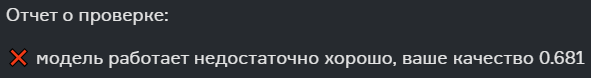

In [36]:
# Попробуем немного увеличить глубину

model = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=12, class_weight={0: (y_train == 0).sum()/(y_train == 1).sum(), 1: (y_train == 1).sum()/(y_train == 0).sum()})
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 7.344370860927152,
                                     1: 0.13615870153291254},
                       max_depth=12, n_estimators=10, random_state=42)

In [37]:
# Повторное предсказание

test_df = test_df.set_index(['Deal_id'])
test_df = test_df.drop(['Prediction'], axis=1)
test_df['Prediction'] = model.predict_proba(test_df)[:, 1].ravel()
test_df = test_df.reset_index()
pred = test_df[['Deal_id', 'Prediction']]
pred.to_csv('prediction.csv', index=False)

Получаем хорошее качество

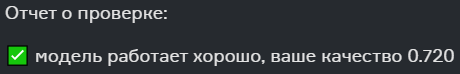

Видимо, глубина 10 не сработала из-за особенностей и маленького количества тестовых данных, но немного доработав модель удалось неплохо повысить качество.

Посмотрим, какие фичи были наиболее важными для модели:

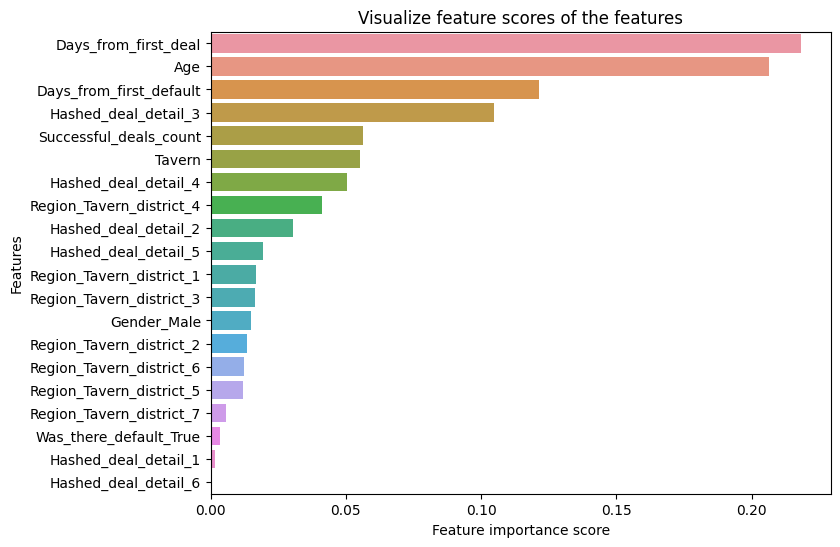

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### Вывод:

Как видно, два выделенных признака - Days_from_first_deal (количество дней, которое прошло с даты первой сделки) и Days_from_first_default (количество дней, которое прошло с момента первого дефолта) - оказались очень даже полезными, а вот признак Was_there_default (был ли у гнома дефолт) оказался одним из последних по важности, обогнав всего 2 признака.

При дальнейших экспериментах было выяснено, что качество сильно меняется при незначительных изменениях параметров n_estimators и max_depth, а также при изменении положения колонок. Скорее всего, это связано с маленьким количеством данных и небольшим количеством деревьев. Поэтому наибольший интерес в этом проекте представляет не сама модель, а обработка и анализ данных, а также выделение новых признаков.

Вместе с Random Forest Classifier была попытка добиться требуемого качества с помощью Catboost Classifier, но многочасовые поиски подходящих параметров не дали результатов, достигнутым максимумом стала цифра 0.687. Скорее всего, это связано с большим разбросом в данных, с которым бустинг не может должным образом справиться. По этой причине эксперименты с кэтбустом в ноутбук добавлены не были.